In [2]:
import argparse
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from collections import OrderedDict

from tqdm import tqdm_notebook as tqdm

import sys
sys.path.insert(0, '/path/to/icevision.cvat/folder')

from cvat import CvatDataset

xml_file = "path/to/xml/file"
%matplotlib inline

In [3]:
ds = CvatDataset()
ds.load(xml_file)

result = []
for image_id in tqdm(ds.get_image_ids()):
    filename = "{:0>6}".format(image_id)
    boxes = ds.get_boxes(image_id)
    for box in boxes:
        label = box["label"].replace("_", ".")
        record = {k: int(box[k]) for k in ["xtl", "ytl", "xbr", "ybr"]}
        record["frame"] = int(os.path.join("", filename))
        record["class"] = label

        result.append(record)

df = pd.DataFrame(result, columns=["frame", "xtl", "ytl", "xbr", "ybr", "class"])


## 1. Распределение классов

In [4]:
labels = df["class"]
labels = list(set(labels))
labels.sort()

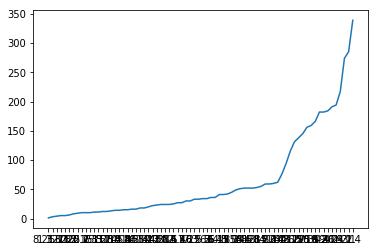

In [5]:
result = {label: len(df.loc[df["class"] == label]) for label in labels}
#result = OrderedDict(sorted(result.items(), key=lambda x: x[1]))
result = sorted(result.items(), key=lambda kv: kv[1])
x, y = zip(*result)
plt.plot(x, y)
plt.show()

## Распределения размеров боксов

In [6]:
df["height"] = df.ybr - df.ytl
df["width"]  = df.xbr - df.xtl
df["square"] = df.height * df.width

In [7]:
heights = df["height"]
heights = list(set(heights))
heights.sort()

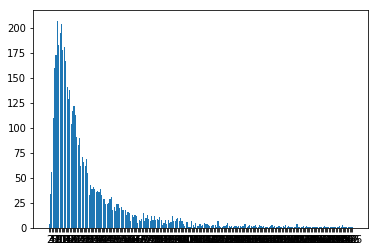

In [8]:
D = {x: len(df.loc[df["height"] == x]) for x in heights}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [9]:
widths = df["width"]
widths = list(set(widths))
widths.sort()

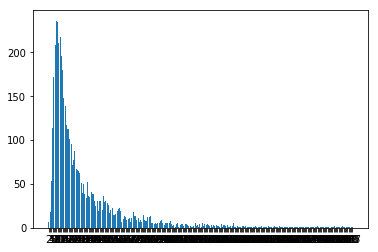

In [10]:
D = {x: len(df.loc[df["width"] == x]) for x in widths}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [11]:
squares = df["square"]
squares = list(set(squares))
squares.sort()

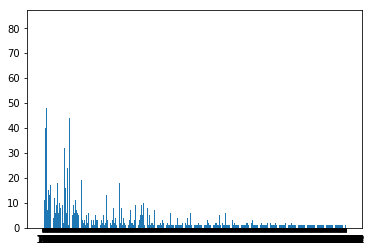

In [12]:
D = {x: len(df.loc[df["square"] == x]) for x in squares}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

## Распределение отношения сторон боксов

In [13]:
df["ratio"]  = round(df.height / df.width, 1)

In [14]:
ratios = df["ratio"]
ratios = list(set(ratios))
ratios.sort()

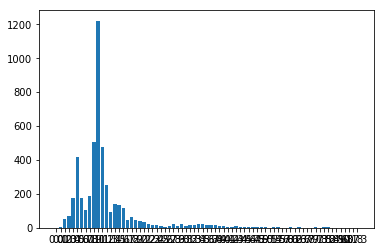

In [15]:
D = {x: len(df.loc[df["ratio"] == x]) for x in ratios}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

## Карта вероятности обнаружения бокса на изображении

In [16]:
prob = np.zeros((1, 2048, 2448))

In [17]:
for index,row in tqdm(df.iterrows()):
    for x in range(row["xtl"], row["xbr"]):
        for y in range(row["ytl"], row["ybr"]):
            prob[0][y][x] += 1

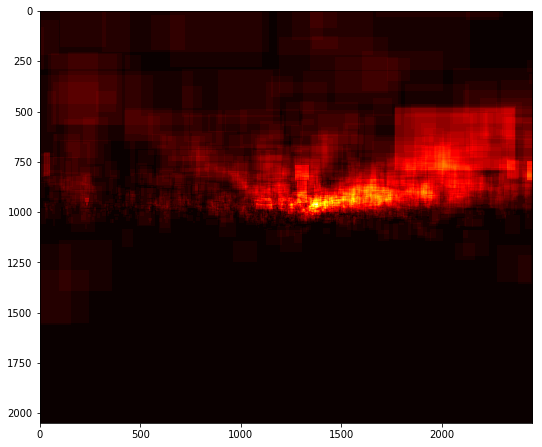

In [18]:
plt.figure(figsize=(30,40))
plt.subplot(1,3,1)
plt.imshow(prob[0], cmap='hot')
plt.show()
